In [1]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
from sklearn.decomposition import PCA

In [2]:
# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data / 255.0
y = mnist.target

In [3]:
# Select 10000 random points
np.random.seed(42)  # For reproducibility
indices = np.random.choice(range(X.shape[0]), size=10000, replace=False)
X_subset = X.iloc[indices]
y_subset = y.iloc[indices]


In [4]:
# Apply PCA for initial dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_subset)

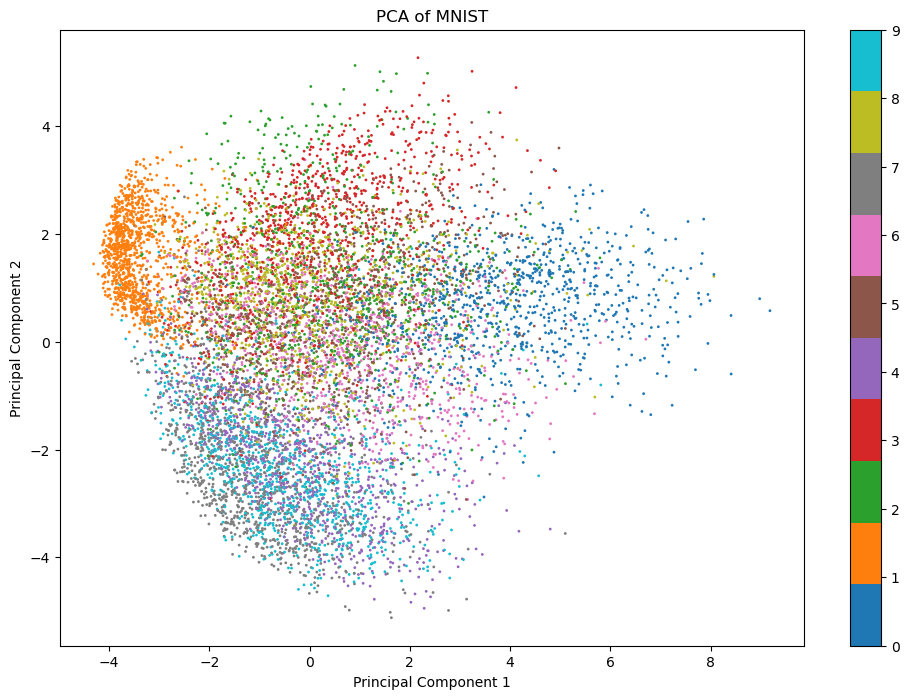

In [5]:
# Plotting with Matplotlib
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_subset.astype(int), cmap='tab10', s=1)
plt.colorbar(scatter)
plt.title('PCA of MNIST')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [6]:
# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_subset)

c:\Users\Neil\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
c:\Users\Neil\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Neil\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Neil\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Neil\anaconda3\Lib\subprocess.py", line 1026, in __init__
    se

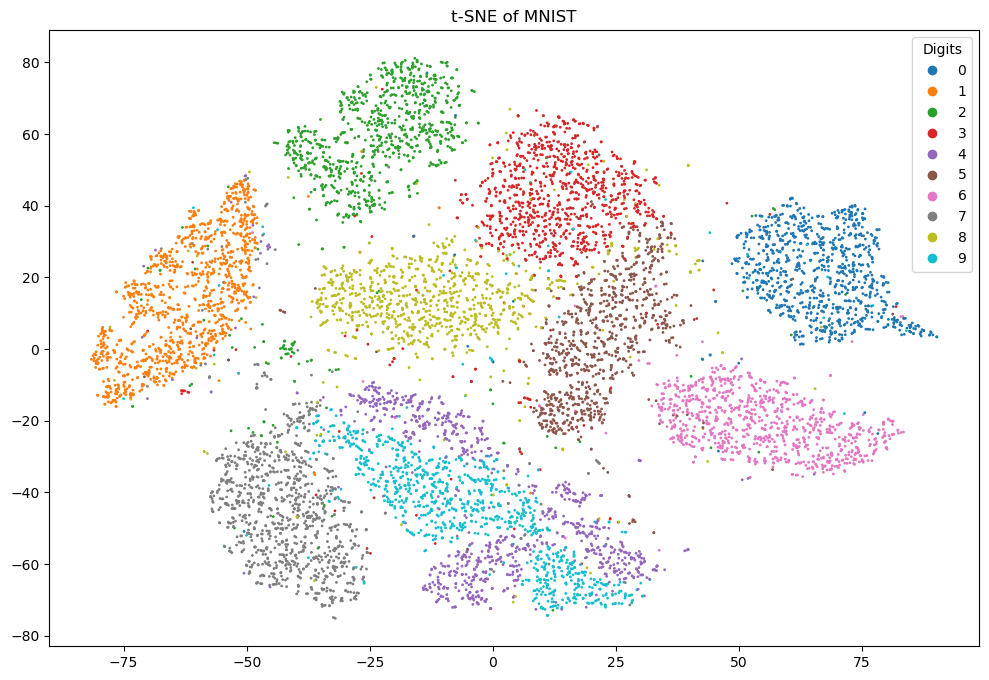

In [7]:
# Plot the result
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_subset.astype(int), cmap='tab10', s=1)
plt.legend(*scatter.legend_elements(), title="Digits")
plt.title('t-SNE of MNIST')
plt.show()